<a href="https://colab.research.google.com/github/sidra3921/stock-price-forecasting-sidra2225165138/blob/main/Week_02_Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📅 Week 2 – Data Cleaning
**Name:** Sidra  
**Project:** Stock Price Forecasting (Apple Dataset)  
**Course:** Applied Data Science with AI  


In [ ]:
import pandas as pd
import numpy as np


In [3]:
!mkdir -p ~/.kaggle
from google.colab import files
files.upload()   # yahan kaggle.json upload karo
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json


In [4]:
!kaggle datasets download -d yousufshah/10-year-daily-stock-data-of-apple-2015-to-2025 -p data/raw
!unzip -o data/raw/10-year-daily-stock-data-of-apple-2015-to-2025.zip -d data/raw
!ls data/raw


Dataset URL: https://www.kaggle.com/datasets/yousufshah/10-year-daily-stock-data-of-apple-2015-to-2025
License(s): apache-2.0
  0% 0.00/114k [00:00<?, ?B/s]
100% 114k/114k [00:00<00:00, 333MB/s]
Archive:  data/raw/10-year-daily-stock-data-of-apple-2015-to-2025.zip
  inflating: data/raw/apple_stock_10years_daywise.xlsx  
10-year-daily-stock-data-of-apple-2015-to-2025.zip
apple_stock_10years_daywise.xlsx


In [5]:
import pandas as pd

df = pd.read_excel("data/raw/apple_stock_10years_daywise.xlsx")
df['Date'] = pd.to_datetime(df['Date'])  # Date ko datetime me convert
df.head()


,Date,Close,High,Low,Open,Volume
0,2015-04-13,28.33,28.71,28.28,28.67,145460400
1,2015-04-14,28.21,28.43,28.12,28.36,102098400
2,2015-04-15,28.31,28.39,28.14,28.23,115881600
3,2015-04-16,28.18,28.38,28.16,28.20,113476000
4,2015-04-17,27.86,28.17,27.80,28.04,207828000


In [6]:
df.set_index('Date', inplace=True)
df = df.sort_index()
df.head()


,Close,High,Low,Open,Volume
Date,,,,,
2015-04-13,28.33,28.71,28.28,28.67,145460400
2015-04-14,28.21,28.43,28.12,28.36,102098400
2015-04-15,28.31,28.39,28.14,28.23,115881600
2015-04-16,28.18,28.38,28.16,28.20,113476000
2015-04-17,27.86,28.17,27.80,28.04,207828000


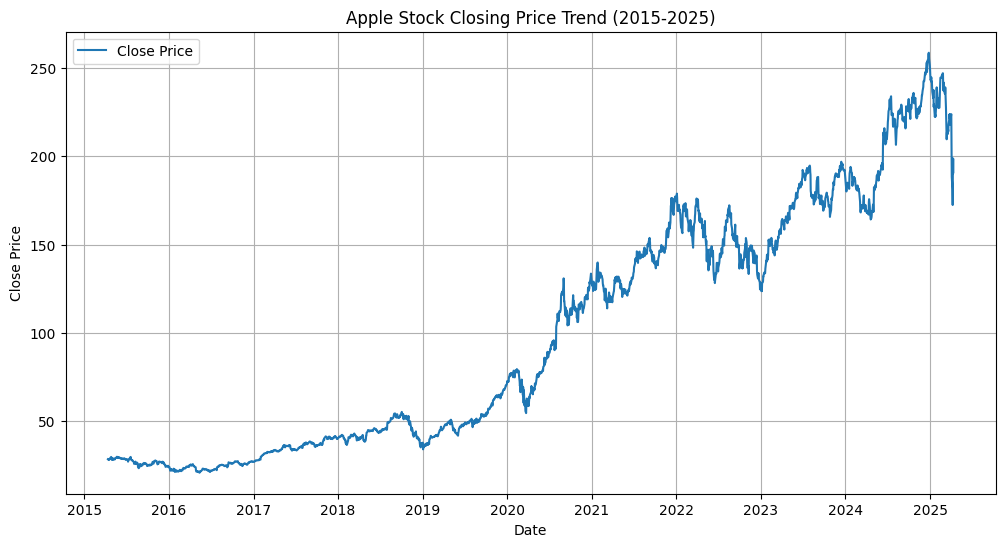

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Close Price')
plt.title("Apple Stock Closing Price Trend (2015-2025)")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()


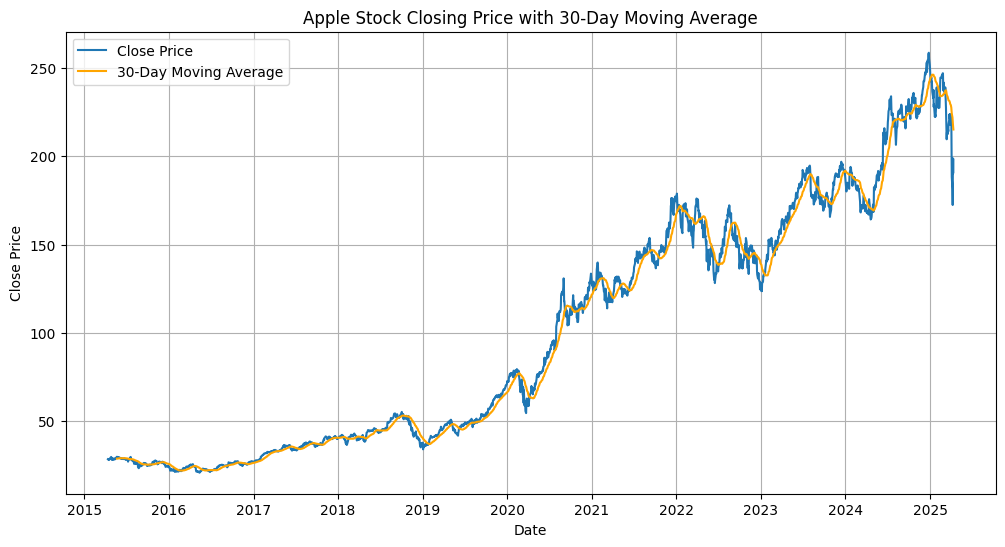

In [8]:
df['MA30'] = df['Close'].rolling(window=30).mean()

plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['MA30'], label='30-Day Moving Average', color='orange')
plt.title("Apple Stock Closing Price with 30-Day Moving Average")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()


/tmp/ipython-input-3232160457.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df['Close'].resample('M').mean()


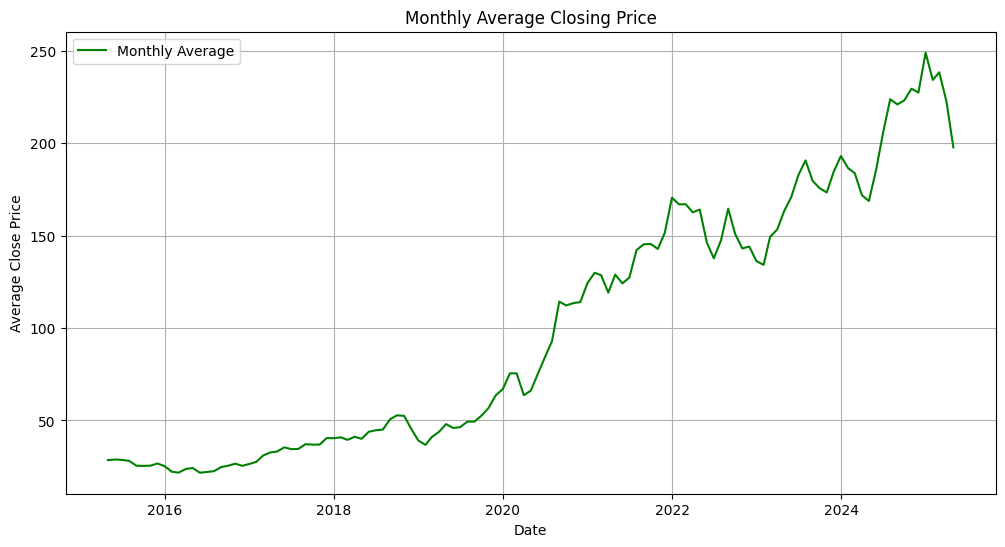

In [9]:
monthly_avg = df['Close'].resample('M').mean()
plt.figure(figsize=(12,6))
plt.plot(monthly_avg, label='Monthly Average', color='green')
plt.title("Monthly Average Closing Price")
plt.xlabel("Date")
plt.ylabel("Average Close Price")
plt.legend()
plt.grid(True)
plt.show()


In [10]:
# Duplicates check
duplicates = df.duplicated().sum()
print("Total duplicates before cleaning:", duplicates)

# Remove duplicates
df_clean = df.drop_duplicates()
print("Total duplicates after cleaning:", df_clean.duplicated().sum())


Total duplicates before cleaning: 0
Total duplicates after cleaning: 0


In [11]:
# Missing values check
print(df_clean.isnull().sum())

# Agar missing values hon to fill karna ya remove karna
# Yahan hum fill forward kar rahe hain (pichli value se)
df_clean = df_clean.fillna(method='ffill')

# Dubara check karo
print("Missing values after cleaning:")
print(df_clean.isnull().sum())


Close      0
High       0
Low        0
Open       0
Volume     0
MA30      29
dtype: int64
Missing values after cleaning:
Close      0
High       0
Low        0
Open       0
Volume     0
MA30      29
dtype: int64


/tmp/ipython-input-771024136.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_clean = df_clean.fillna(method='ffill')


In [12]:
import numpy as np

Q1 = df_clean['Close'].quantile(0.25)
Q3 = df_clean['Close'].quantile(0.75)
IQR = Q3 - Q1

# Outlier condition
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Outliers count
outliers = ((df_clean['Close'] < lower_bound) | (df_clean['Close'] > upper_bound)).sum()
print("Total outliers in Close Price:", outliers)

# Outliers remove
df_clean = df_clean[(df_clean['Close'] >= lower_bound) & (df_clean['Close'] <= upper_bound)]


Total outliers in Close Price: 0


In [13]:
print("Before Cleaning:")
print(df.shape)

print("\nAfter Cleaning:")
print(df_clean.shape)

print("\nDuplicates Before:", duplicates)
print("Duplicates After:", df_clean.duplicated().sum())


Before Cleaning:
(2517, 6)

After Cleaning:
(2517, 6)

Duplicates Before: 0
Duplicates After: 0


In [14]:
df_clean.to_csv("apple_stock_cleaned.csv")
